<a href="https://colab.research.google.com/github/RenChoi/pickme/blob/main/%D1%82%D0%B5%D1%81%D1%82_0804.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

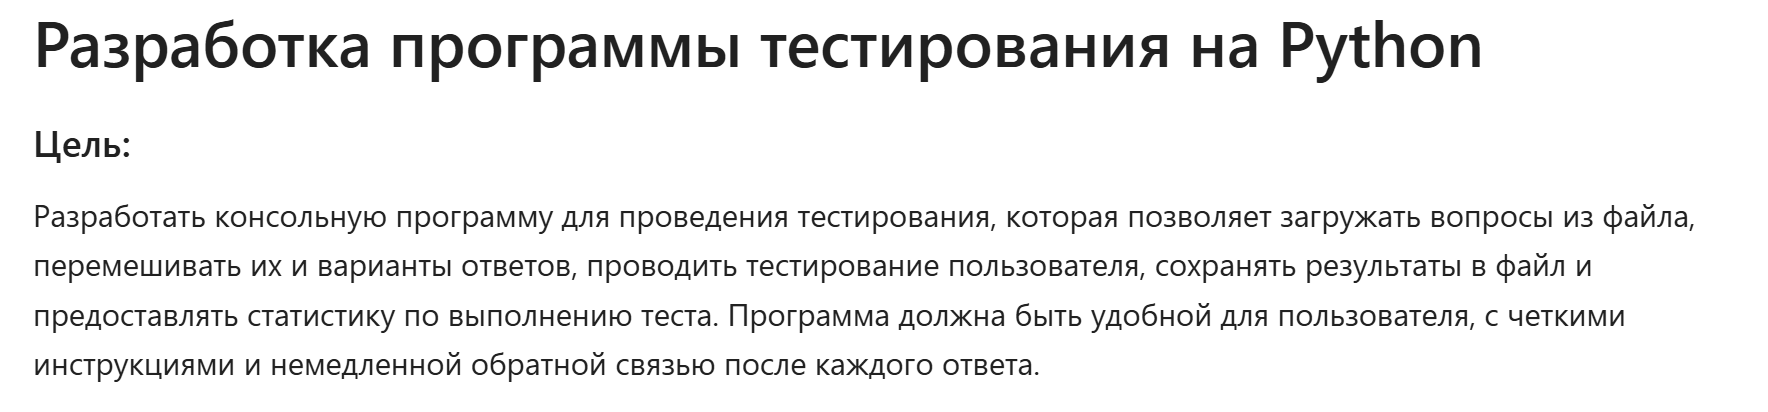

In [ ]:
import random
import time
from datetime import datetime

class Question:
    def __init__(self, line):
        parts = line.strip().split('|')
        if len(parts) != 7:
            raise ValueError("Неверный формат вопроса. Ожидается 7 элементов через '|'")
        self.text = parts[0]
        self.options = parts[1:6]
        self.correct_answer_text = parts[6]
        self.correct_index = None

    def shuffle_options(self):
        option_flag_pairs = []
        for option in self.options:
            is_correct = (option.strip().lower() == self.correct_answer_text.strip().lower())
            option_flag_pairs.append((option, is_correct))
        random.shuffle(option_flag_pairs)
        self.options = []
        for idx, (option, flag) in enumerate(option_flag_pairs):
            self.options.append(option)
            if flag:
                self.correct_index = idx
        if self.correct_index is None:
            raise ValueError("Правильный ответ не найден среди вариантов.")

def load_questions(filename):
    questions = []
    try:
        with open(filename, encoding='utf-8') as f:
            for line in f:
                if line.strip():
                    try:
                        q = Question(line)
                        q.shuffle_options()
                        questions.append(q)
                    except ValueError as ve:
                        print(f"Ошибка в строке файла: {line.strip()} -> {ve}")
                        continue
    except FileNotFoundError:
        print(f"Файл {filename} не найден.")
        exit(1)
    except Exception as e:
        print(f"Ошибка при чтении файла: {e}")
        exit(1)
    return questions

def save_results(filename, start_time, end_time, total, correct):
    percentage = (correct / total * 100) if total > 0 else 0
    try:
        with open(filename, 'a', encoding='utf-8') as f:
            f.write(f"Время начала теста: {start_time.strftime('%Y-%m-%d %H:%M:%S')}\n")
            f.write(f"Время окончания теста: {end_time.strftime('%Y-%m-%d %H:%M:%S')}\n")
            f.write(f"Общее количество вопросов: {total}\n")
            f.write(f"Количество правильных ответов: {correct}\n")
            f.write(f"Процент правильных ответов: {percentage:.2f}%\n")
            f.write("-" * 40 + "\n")
    except Exception as e:
        print(f"Ошибка при сохранении результатов: {e}")

def get_user_answer():
    while True:
        answer = input("Введите номер ответа (от 1 до 5): ").strip()
        if answer.isdigit():
            num = int(answer)
            if 1 <= num <= 5:
                return num - 1
        print("Некорректный ввод. Попробуйте еще раз.")

def main():
    questions_file = "questions.txt"
    results_file = "results.txt"

    questions = load_questions(questions_file)
    if not questions:
        print("Нет вопросов для тестирования. Завершение программы.")
        exit(1)

    random.shuffle(questions)

    total_questions = len(questions)
    correct_answers = 0

    print("Начало теста. Всего вопросов:", total_questions)
    start_time = datetime.now()

    for idx, question in enumerate(questions, start=1):
        print(f"\nВопрос {idx}/{total_questions}: {question.text}")
        for i, option in enumerate(question.options, start=1):
            print(f"{i}. {option}")
        user_answer = get_user_answer()
        if user_answer == question.correct_index:
            print("Правильно!")
            correct_answers += 1
        else:
            print("Неправильно.")

    end_time = datetime.now()
    percentage = (correct_answers / total_questions * 100) if total_questions > 0 else 0

    print("\nТестирование завершено!")
    print("Общее количество вопросов:", total_questions)
    print("Количество правильных ответов:", correct_answers)
    print(f"Процент правильных ответов: {percentage:.2f}%")

    save_results(results_file, start_time, end_time, total_questions, correct_answers)
    print(f"Результаты тестирования сохранены в файл {results_file}.")

main()


Начало теста. Всего вопросов: 20

Вопрос 1/20: Какая база данных является нереляционной (NoSQL)?
1. SQLite
2. MongoDB
3. Oracle
4. PostgreSQL
5. MySQL
Введите номер ответа (от 1 до 5): 5
Неправильно.

Вопрос 2/20: Какое расширение файла обычно используется для скриптов на языке Python?
1. .java
2. .js
3. .php
4. .py
5. .rb
Введите номер ответа (от 1 до 5): 4
Правильно!

Вопрос 3/20: Какой фреймворк чаще всего используется для создания RESTful API на Python?
1. React
2. Vue.js
3. Angular
4. Flask
5. Django
Введите номер ответа (от 1 до 5): 2
Неправильно.

Вопрос 4/20: Какой язык программирования чаще всего используется для создания серверной части веб-приложений?
1. Swift
2. PHP
3. Kotlin
4. JavaScript
5. C#
Введите номер ответа (от 1 до 5): 2
Правильно!

Вопрос 5/20: Какая из перечисленных технологий является JavaScript-библиотекой для работы с пользовательским интерфейсом?
1. Django
2. React
3. Node.js
4. Laravel
5. Flask
Введите номер ответа (от 1 до 5): 5
Неправильно.

Вопрос 6/20: 